In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube/USvideos.csv
/kaggle/input/youtube/GBcomments.csv
/kaggle/input/youtube/US_category_id.json
/kaggle/input/youtube/UScomments.csv
/kaggle/input/youtube/GBvideos.csv
/kaggle/input/youtube/GB_category_id.json


In [2]:
df=pd.read_csv('/kaggle/input/youtube/UScomments.csv',usecols=range(4))

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns=['video_id','comment_text','likes','replies']

In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.dropna(inplace=True) #removing the rows with Nan values in the field 'comment_text'

In [6]:
df = df.drop(columns=['likes', 'replies'], axis=1)# Print out the first rows of papers
df.head()

,video_id,comment_text
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️
1,XpVt6Z1Gjjo,I've been following you from the start of your...
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,MY FAN . attendance
4,XpVt6Z1Gjjo,trending 😉


In [7]:
# Load the regular expression library
import re# Remove punctuation
df['comment_text_processed'] = df['comment_text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
df['comment_text_processed'] = df['comment_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
df['comment_text_processed'].head()

0                    logan paul it's yo big day ‼️‼️‼️
1    i've been following you from the start of your...
2                   say hi to kong and maverick for me
3                                   my fan  attendance
4                                           trending 😉
Name: comment_text_processed, dtype: object

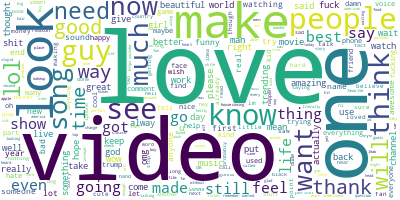

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(df['comment_text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

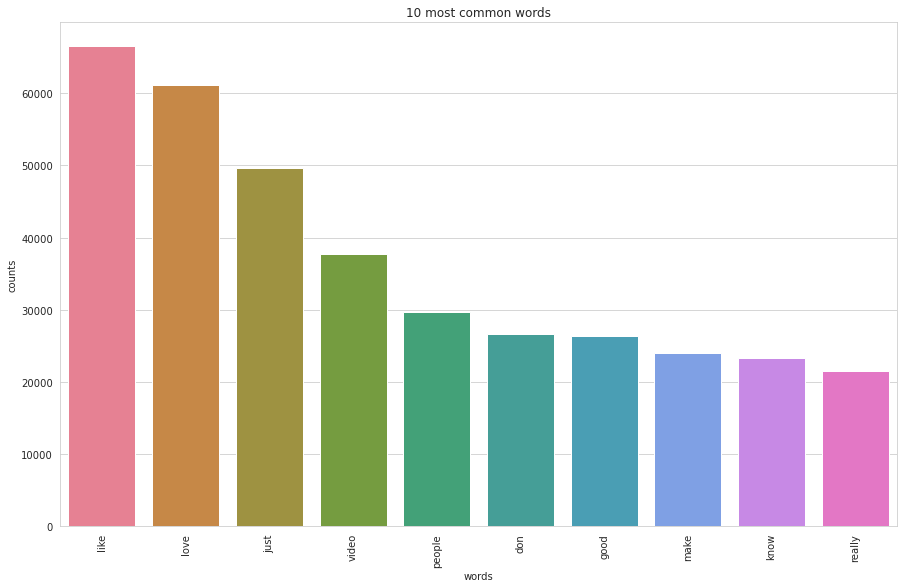

In [13]:

%matplotlib inline
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['comment_text_processed'])# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [14]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
trending cool new im views game season lol best congrats

Topic #1:
like just people don think know time good feel really

Topic #2:
omg just like channel youtube got video https wait come

Topic #3:
lol que funny la oh birthday xd nand lmao el

Topic #4:
best love ni know don world like just live need

Topic #5:
iphone did baby cute use just yeah want inside like

Topic #6:
like looks love look just good movie video girl really

Topic #7:
people black white don phone just good racist youtube country

Topic #8:
people trump shit make fuck fucking like stop stupid just

Topic #9:
love video song amazing great thank beautiful music god nice
